<a href="https://colab.research.google.com/github/thiagoxgomes/DNC-GIT/blob/main/Mini_projeto_Roof_im%C3%B3veis_v3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


**Mini Projeto - Roof Imóveis**






In [ ]:
pip install geopy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [285]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter('ignore')
pd.options.display.float_format = "{:.2f}".format
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="geoapiExercises")

**- Business understanding**

Roof Imóveis é uma das maiores empresas do ramo imobiliário Brasileiro 
e quer expandir sua área de atuação fazendo um investimento internacional, 
com isso, ela contratou você para uma consultoria estratégica.
A empresa irá investir em imóveis no Condado de County, nos Estados 
Unidos.

# - Qual a minha meta?

saber qual seria os 5 imóveis que ela deveria investir e o porquê e quais 5 você não recomendaria o investimento de jeito nenhum.

Estratégia 1:

Imóveis com grandes área e valores muito acima da média, serão elimanados da ánalise visto que essa caracteristica de imóveis são mais difícies de vender. Assim, eliminaremos dados da analise de imoveis que não serão obervados e evitaremos possíveis outliers.
- Foi desconsiderado imóveis com valores a cima de 1,5 milhões conforme analise de gráfico de caixa. Foi desconsiderado os outliers

- Foi desconsiderado imóveis com áreas internas a cima de 4.500 FT conforme analise de gráfico de caixa. Foi desconsiderado os outliers


- Foi desconsiderado imóveis com áreas externa a cima de 17.500 FT conforme analise de gráfico de caixa. Foi desconsiderado os outliers


**Segunda estratégia:**

Calcular o valor médio do metro quadrado/ft das regiões do condado, para se juntar com a média dos 15 imóveis mais próximos, e analisar os riscos de compra dos imovéis que possuem um valor com uma dispoersão significativa dessa média.


**Terceira estratégia:**

Separar imóveis que já foram revendidos em dois dataframes:
 - valorizados  
 - desvalorizados
Calcular valor de desvalorização ou valorização


**Quarta estratégia:**

Correlacionar Ano de contrução x Ano de restauração x preço.
Para ajudar na validação e analise.


# - Como posso chegar?

Os imoveis deverão ser agrupados por região para o cálculo da média. 
Será necessário agrupar através do CEP.

 - Dados disponíveis 
 Dataset: https://www.kaggle.com/harlfoxem/housesalesprediction

 - Não será necessário outras fontes de dados.




In [286]:
df = pd.read_csv('/content/kc_house_data.csv')

# - Data understanding

 A Coleta de Dados:
 - Os dados que eu tenho fazem sentido?
 - Estão no formato que eu gostaria?

 Será necessário corrigir formato dos preços do tipo float com 2 zeros na casa decimal para melhor analise de valores e média. Foi utilizado a função "pd.options.display.float_format"

 - O que mais eu consigo obter de informação destes dados?

Dataset detalhado: 
https://geodacenter.github.io/data-and-lab/KingCounty-HouseSales2015


In [ ]:
df.info()

In [ ]:
#df.shape

#df.isnull().sum() / df.shape[0]
#df[df["price"]>2500000]
#df["sqft_living"].describe()
#df["price"].describe()
#df[df["price"]==7.500000e+04]



In [130]:
#pd.options.display.float_format = "{:.2f}".format   ## função para alterar quantidade de zeros depois do ponto 
df["price"].describe()



count     21613.00
mean     540088.14
std      367127.20
min       75000.00
25%      321950.00
50%      450000.00
75%      645000.00
max     7700000.00
Name: price, dtype: float64

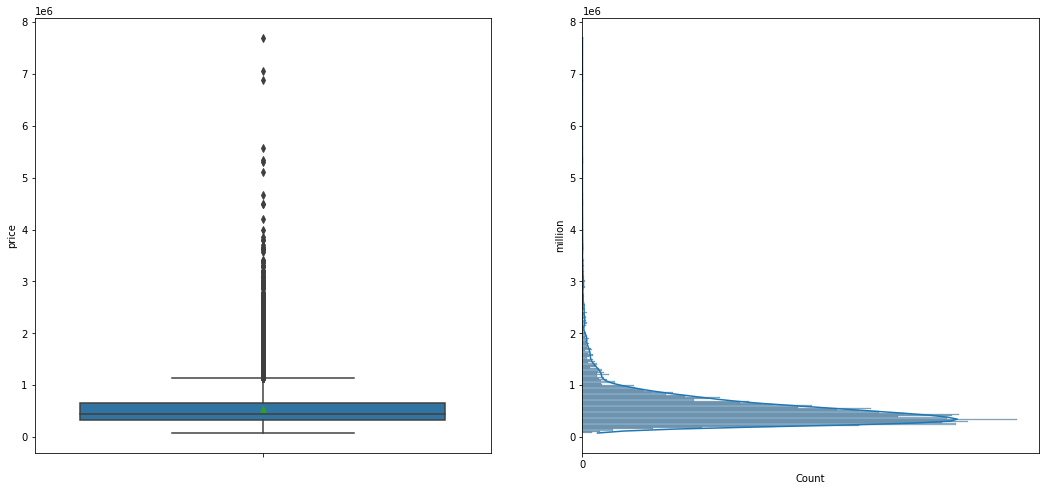

In [ ]:
fig,axes = plt.subplots(ncols=2, figsize=(18,8))
sns.boxplot(column = ['price']).set_ylabel('million')
sns.boxplot(data=df, y='price' , ax=axes[0], showmeans=True)    ###para ver mediana e outlies
sns.histplot(data=df, y='price' , kde=True, ax=axes[1])

plt.show()

In [ ]:
df["sqft_living"].describe()

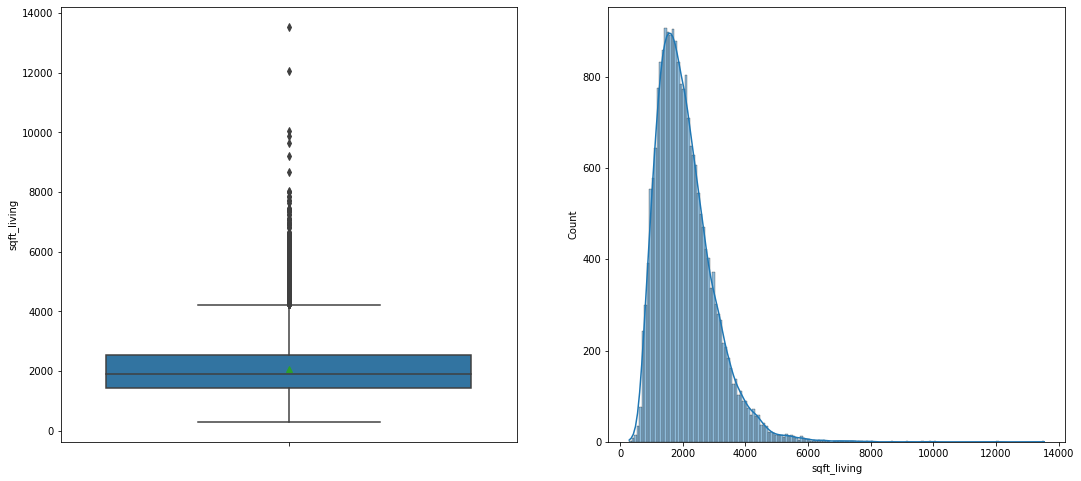

In [ ]:
fig,axes = plt.subplots(ncols=2, figsize=(18,8))
sns.boxplot(data=df, y='sqft_living' , ax=axes[0], showmeans=True)    ###para ver mediana e outlies
sns.histplot(data=df, x='sqft_living' , kde=True, ax=axes[1])

plt.show()

In [ ]:
#df["sqft_lot"].describe()
df_1 = df[df["sqft_lot"]<20688]
df_1["sqft_lot"].describe()

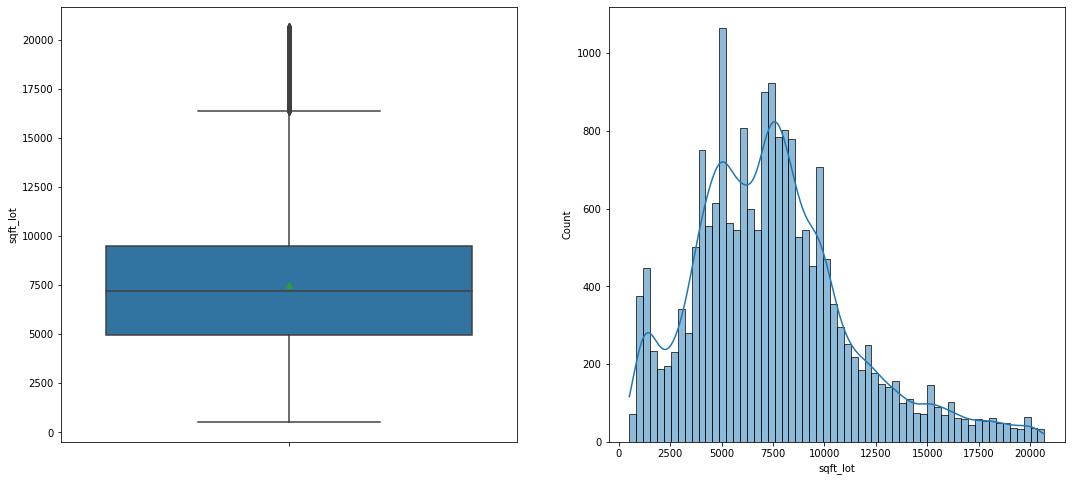

In [ ]:
fig,axes = plt.subplots(ncols=2, figsize=(18,8))
sns.boxplot(data=df_1, y='sqft_lot' , ax=axes[0], showmeans=True)    ###para ver mediana e outlies
sns.histplot(data=df_1, x='sqft_lot' , kde=True, ax=axes[1])

plt.show()

In [ ]:
df["bedrooms"].describe()
fig,axes = plt.subplots(ncols=2, figsize=(18,8))
sns.boxplot(data=df_1, y='bedrooms' , ax=axes[0], showmeans=True)    ###para ver mediana e outlies
sns.histplot(data=df_1, x='bedrooms' , kde=True, ax=axes[1])

plt.show()


# **Data preparation**




In [287]:
##DATA PREPARATION
#filtro para remoção de outliers e valores fora da estratégia.
df_new = df[(df["price"]<=1500000) & (df["sqft_living"]<=4500) & (df["sqft_lot"]<=17500)]


In [ ]:
##DATA PREPARATION
## PEGANDO LOCALIZAÇÃO UTILIZANDO ATRAVÉS DO ZIPCODE
# Zipcode input
#zipcode = "98178"
# 
# Using geocode()
#location = geolocator.geocode(zipcode)
# 
# Displaying address details
#print("Zipcode:",zipcode)
#print(location)
#arr = np.array([geolocator.geocode(i) for i in df_new.zipcode])

In [288]:
##DATA PREPARATION
#Adicionar coluna com valores do metro quadrado - Square Ft
df_new['preco_sqft_lot'] = df_new['price'] / df_new['sqft_lot']
df_new['preco_sqft_living'] = df_new['price'] / df_new['sqft_living']





In [289]:
##DATA PREPARATION
#Criar 2 dataframes de imoveis valorizados e desvalorizados e informar valor de diferença
id_list = []
id_counts = df_new.id.value_counts()
id_list = id_counts.index[id_counts.values > 1]   ####verifica se existe mais de uma linha com o mesmo id(revenda)
df_revenda = df_new[df_new['id'].isin(id_list)].reset_index()
df_rev_valuation = pd.DataFrame()
df_rev_devaluation = pd.DataFrame()
list_valuation = []
list_devaluation = []
list_val_1stprice = []
list_deval_1stprice = []
for i in df_revenda.index:
  price_i = df_revenda.price.values[df_revenda.index==i]
  id_i = df_revenda.id.values[df_revenda.index==i]
  for x in df_revenda.index:
    if x != i:
      id_x = df_revenda.id.values[df_revenda.index==x]
      if id_i == id_x:
        price_x = df_revenda.price.values[df_revenda.index==x]
        if_valuation = (price_i+price_x)/2         ### calculo para veriricar se ouve valorização ou não      
        if if_valuation >= price_i:
          valuation = price_x - price_i
          df_rev_valuation = pd.concat([df_rev_valuation, df_revenda[df_revenda.index==x]])
          list_val_1stprice.append(price_i)
          list_valuation.append(valuation)
        else:
          devaluation = price_i - price_x
          df_rev_devaluation = pd.concat([df_rev_devaluation, df_revenda[df_revenda.index==x]])
          list_deval_1stprice.append(price_i)
          list_devaluation.append(devaluation)

df_rev_valuation['first_price'] = list_val_1stprice
df_rev_devaluation['first_price'] = list_deval_1stprice
df_rev_valuation['valuation'] = list_valuation
df_rev_devaluation['devaluation'] = list_devaluation

In [ ]:
df_rev_devaluation

In [290]:
##DATA PREPARATION
#Agregando zipcode e calculando medias do metro quadrado, preco, e preco por metro quadrado
df_zipcode_mean = df_new.groupby(["zipcode"])[['price','sqft_living','sqft_lot','preco_sqft_lot','preco_sqft_living']].mean()
df_zipcode_mean.rename(columns={'price': 'zmean_price', 'sqft_living': 'zmean_sqft_living', 'sqft_lot': 'zmean_sqft_lot', 'preco_sqft_lot': 'zmean_preco_sqft_lot', 'preco_sqft_living': 'zmean_preco_sqft_living'}, inplace=True)
df_new2 = df_new
list_zmean_price = [ ]
list_zmean_sqft_living = [ ]
list_zmean_sqft_lot = [ ]
list_zmean_preco_sqft_lot = [ ]
list_zmean_preco_sqft_living = [ ]
for i in df_new.index:
  zipcode = df_new.zipcode[df_new.index==i].values[0]
  mean_price = df_zipcode_mean['zmean_price'][df_zipcode_mean.index==zipcode].values[0]
  list_zmean_price.append(mean_price)
  mean_sqft_living = df_zipcode_mean['zmean_sqft_living'][df_zipcode_mean.index==zipcode].values[0]
  list_zmean_sqft_living.append(mean_sqft_living)
  mean_sqft_lot = df_zipcode_mean['zmean_sqft_lot'][df_zipcode_mean.index==zipcode].values[0]
  list_zmean_sqft_lot.append(mean_sqft_lot)
  mean_preco_sqft_lot = df_zipcode_mean['zmean_preco_sqft_lot'][df_zipcode_mean.index==zipcode].values[0]
  list_zmean_preco_sqft_lot.append(mean_preco_sqft_lot)
  mean_preco_sqft_living = df_zipcode_mean['zmean_preco_sqft_living'][df_zipcode_mean.index==zipcode].values[0]
  list_zmean_preco_sqft_living.append(mean_preco_sqft_living)

df_new2['zmean_price'] = list_zmean_price 
df_new2['zmean_sqft_living'] = list_zmean_sqft_living
df_new2['zmean_sqft_lot'] = list_zmean_sqft_lot 
df_new2['zmean_preco_sqft_lot'] = list_zmean_preco_sqft_lot 
df_new2['zmean_preco_sqft_living'] = list_zmean_preco_sqft_living 




In [297]:
df_new2['diff_price'] = df_new2['price'] - df_new2['zmean_price']
df_new2['diff_preco_sqft_lot'] = df_new2['preco_sqft_lot'] - df_new2['zmean_preco_sqft_lot']
df_new2['diff_preco_sqft_lot'] = df_new2['preco_sqft_living'] - df_new2['zmean_preco_sqft_living']
df_new2['diff_preco_sqft_lot'] = df_new2['sqft_lot15'] - df_new2['zmean_sqft_lot']
df_new2['diff_preco_sqft_lot'] = df_new2['sqft_living15'] - df_new2['zmean_sqft_living']

In [308]:
##DATA PREPARATION
#Criar 2 dataframes de imoveis valorizados e desvalorizados e informar valor de diferença
id_list = []
id_counts = df_new2.id.value_counts()
id_list = id_counts.index[id_counts.values > 1]   ####verifica se existe mais de uma linha com o mesmo id(revenda)
df_revenda = df_new2[df_new2['id'].isin(id_list)].reset_index()
df_rev_valuation = pd.DataFrame()
df_rev_devaluation = pd.DataFrame()
list_valuation = []
list_devaluation = []
list_val_1stprice = []
list_deval_1stprice = []
for i in df_revenda.index:
  price_i = df_revenda.price.values[df_revenda.index==i]
  id_i = df_revenda.id.values[df_revenda.index==i]
  for x in df_revenda.index:
    if x != i:
      id_x = df_revenda.id.values[df_revenda.index==x]
      if id_i == id_x:
        price_x = df_revenda.price.values[df_revenda.index==x]
        if_valuation = (price_i+price_x)/2         ### calculo para veriricar se ouve valorização ou não      
        if if_valuation >= price_i:
          valuation = price_x - price_i
          df_rev_valuation = pd.concat([df_rev_valuation, df_revenda[df_revenda.index==x]])
          list_val_1stprice.append(price_i)
          list_valuation.append(valuation)
        else:
          devaluation = price_i - price_x
          df_rev_devaluation = pd.concat([df_rev_devaluation, df_revenda[df_revenda.index==x]])
          list_deval_1stprice.append(price_i)
          list_devaluation.append(devaluation)

df_rev_valuation['first_price'] = list_val_1stprice
df_rev_devaluation['first_price'] = list_deval_1stprice
df_rev_valuation['valuation'] = list_valuation
df_rev_devaluation['devaluation'] = list_devaluation

In [309]:
df_rev_valuation

,index,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,preco_sqft_living,zmean_price,zmean_sqft_living,zmean_sqft_lot,zmean_preco_sqft_lot,zmean_preco_sqft_living,diff_price,diff_preco_sqft_lot,first_price,valuation
1,94,6021501535,20141223T000000,700000.00,3,1.50,1580,5000,1.00,0,...,443.04,574792.45,1683.35,4603.47,151.14,363.83,125207.55,-113.35,[430000.0],[270000.0]
3,314,4139480200,20141209T000000,1400000.00,4,3.25,4290,12103,1.00,0,...,326.34,728088.20,2522.81,10244.30,75.40,292.71,671911.80,1337.19,[1384000.0],[16000.0]
5,325,7520000520,20150311T000000,240500.00,2,1.00,1240,12092,1.00,0,...,193.95,337239.28,1587.27,8031.83,46.11,219.95,-96739.28,232.73,[232000.0],[8500.0]
7,346,3969300030,20141229T000000,239900.00,4,1.00,1000,7134,1.00,0,...,239.90,304220.80,1724.40,7682.17,43.17,186.45,-64320.80,-704.40,[165000.0],[74900.0]
9,372,2231500030,20150324T000000,530000.00,4,2.25,2180,10754,1.00,0,...,243.12,385851.15,1608.36,6925.69,82.60,253.97,144148.85,201.64,[315000.0],[215000.0]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308,20181,7853400250,20150219T000000,645000.00,4,3.50,2910,5260,2.00,0,...,221.65,518106.02,2541.91,6482.46,87.56,208.77,126893.98,368.09,[610000.0],[35000.0]
310,20613,2724049222,20141201T000000,220000.00,2,2.50,1000,1092,2.00,0,...,220.00,407584.13,1660.81,5514.61,90.13,262.49,-187584.13,-330.81,[163800.0],[56200.0]
312,20670,8564860270,20150330T000000,502000.00,4,2.50,2680,5539,2.00,0,...,187.31,367200.78,1791.96,10408.16,40.12,213.78,134799.22,888.04,[449990.0],[52010.0]
314,20780,6300000226,20150504T000000,380000.00,4,1.00,1200,2171,1.50,0,...,316.67,385851.15,1608.36,6925.69,82.60,253.97,-5851.15,-478.36,[240000.0],[140000.0]


# **Deployment**

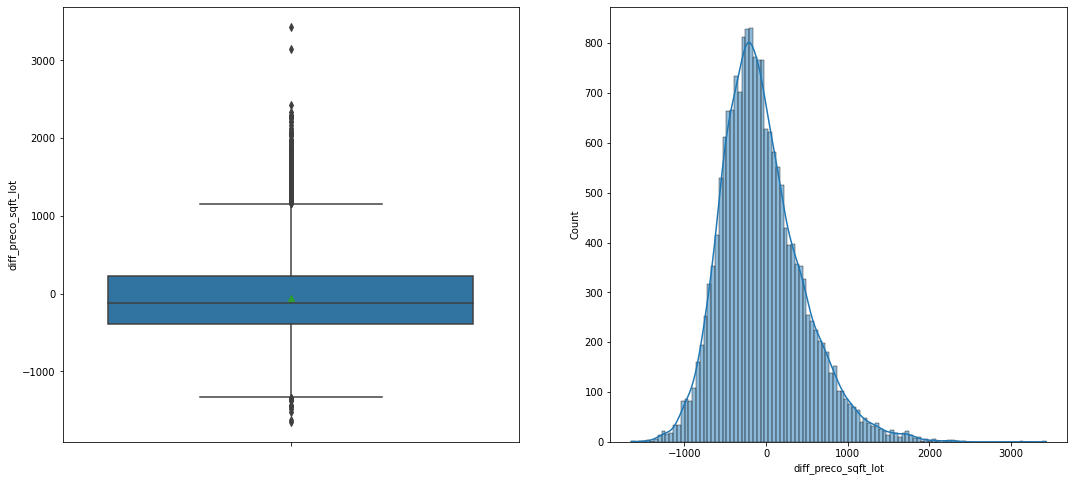

In [302]:
fig,axes = plt.subplots(ncols=2, figsize=(18,8))
sns.boxplot(data=df_new2, y='diff_preco_sqft_lot' , ax=axes[0], showmeans=True)    
sns.histplot(data=df_new2, x='diff_preco_sqft_lot' , kde=True, ax=axes[1])

plt.show()

In [307]:
df_new2[df_new2['diff_preco_sqft_lot']>1000]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_lot15,preco_sqft_lot,preco_sqft_living,zmean_price,zmean_sqft_living,zmean_sqft_lot,zmean_preco_sqft_lot,zmean_preco_sqft_living,diff_price,diff_preco_sqft_lot
42,7203220400,20140707T000000,861990.00,5,2.75,3595,5639,2.00,0,0,...,5639,152.86,239.77,587381.29,2194.54,6106.53,105.99,278.68,274608.71,1430.46
251,1310430400,20140513T000000,455000.00,4,2.50,3360,7685,2.00,0,0,...,6567,59.21,135.42,332280.09,1978.56,8328.62,43.67,174.10,122719.91,1081.44
283,7202360350,20140630T000000,780000.00,4,2.50,3500,7048,2.00,0,0,...,7864,110.67,222.86,587381.29,2194.54,6106.53,105.99,278.68,192618.71,1725.46
313,4139480200,20140618T000000,1384000.00,4,3.25,4290,12103,1.00,0,3,...,11244,114.35,322.61,728088.20,2522.81,10244.30,75.40,292.71,655911.80,1337.19
314,4139480200,20141209T000000,1400000.00,4,3.25,4290,12103,1.00,0,3,...,11244,115.67,326.34,728088.20,2522.81,10244.30,75.40,292.71,671911.80,1337.19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21551,1561750040,20141224T000000,1375000.00,5,4.50,4350,13405,2.00,0,0,...,7208,102.57,316.09,639844.91,2530.78,9486.11,76.39,259.54,735155.09,1459.22
21562,2122059216,20150414T000000,422000.00,4,2.50,2930,5973,2.00,0,0,...,7095,70.65,144.03,291739.27,1952.08,8182.57,39.61,153.49,130260.73,1085.92
21593,8672200110,20150317T000000,1088000.00,5,3.75,4170,8142,2.00,0,2,...,7980,133.63,260.91,399529.66,1979.53,7702.75,58.04,210.61,688470.34,1050.47
21596,7502800100,20140813T000000,679950.00,5,2.75,3600,9437,2.00,0,0,...,9421,72.05,188.88,473383.90,2358.09,8727.44,64.11,202.27,206566.10,1191.91
